In [5]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import itertools
#warnings.filterwarnings("ignore")
matplotlib.rcParams['axes.labelsize'] 
matplotlib.rcParams['xtick.labelsize'] 
matplotlib.rcParams['ytick.labelsize'] 
matplotlib.rcParams['text.color'] = 'k'

In [16]:
pwd

'/Users/bashirm/LOCALCODEROOM'

In [6]:
path_to_data = 'https://raw.githubusercontent.com/bashirmohd/DataSceince/master/Time-series-prediction_production/aofa_lond_in.csv'

In [7]:
df = pd.read_csv(path_to_data)

In [8]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style:groove;
}
</style>

In [9]:
df.head()

,Days,Speed
0,16/10/2018 00:00,971.155230
1,16/10/2018 01:00,918.014878
2,16/10/2018 02:00,713.724641
3,16/10/2018 03:00,765.424668
4,16/10/2018 04:00,938.107670


In [10]:
df.tail()

,Days,Speed
2155,13/01/2019 19:00,948.282200
2156,13/01/2019 20:00,877.484034
2157,13/01/2019 21:00,1593.645507
2158,13/01/2019 22:00,1248.875094
2159,13/01/2019 23:00,1133.892601


In [11]:
df.describe()

,Speed
count,2160.000000
mean,1040.433537
std,657.813456
min,0.000000
25%,688.650986
50%,1074.347426
75%,1449.848603
max,4060.492614


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 2 columns):
Days     2160 non-null object
Speed    2160 non-null float64
dtypes: float64(1), object(1)
memory usage: 33.8+ KB


In [13]:
df.isnull().sum()

Days     0
Speed    0
dtype: int64

In [14]:
df.dtypes

Days      object
Speed    float64
dtype: object

Text(0.5,1,'Aofa_Lond_in Link Speed Over Time In Hours')

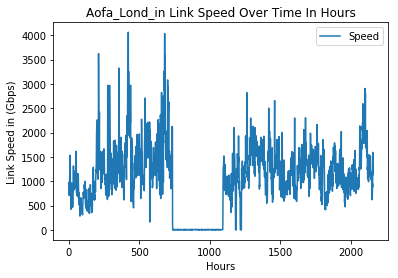

In [15]:
df.plot()
plt.xlabel('Hours')
plt.ylabel('Link Speed in (Gbps)')
plt.title('Aofa_Lond_in Link Speed Over Time In Hours')

In [151]:
df['Days'] =  pd.to_datetime(df['Days'], infer_datetime_format=True)

In [152]:
df.dtypes

Days     datetime64[ns]
Speed           float64
dtype: object

In [153]:
df = df.set_index('Days')

In [154]:
df.head()

,Speed
Days,
2018-10-16 00:00:00,408.349690
2018-10-16 01:00:00,457.998735
2018-10-16 02:00:00,424.732987
2018-10-16 03:00:00,354.733448
2018-10-16 04:00:00,362.946799


In [188]:
df.tail()

,Speed
Days,
2019-01-13 19:00:00,119.590209
2019-01-13 20:00:00,97.765101
2019-01-13 21:00:00,81.826164
2019-01-13 22:00:00,187.980324
2019-01-13 23:00:00,203.064999


In [155]:
df.dtypes

Speed    float64
dtype: object

In [156]:
average_daily_speed = df.resample('D').mean()

In [157]:
average_daily_speed.dtypes

Speed    float64
dtype: object

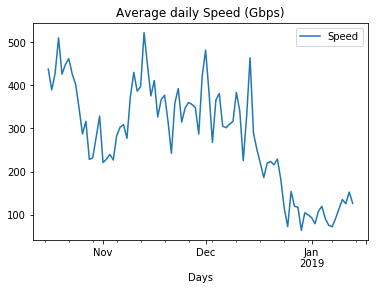

In [158]:
average_daily_speed.plot()
plt.title('Average daily Speed (Gbps)')
plt.show()

In [159]:
#y = average_daily_speed

In [160]:
#y.plot(figsize=(15, 6))
#plt.show()

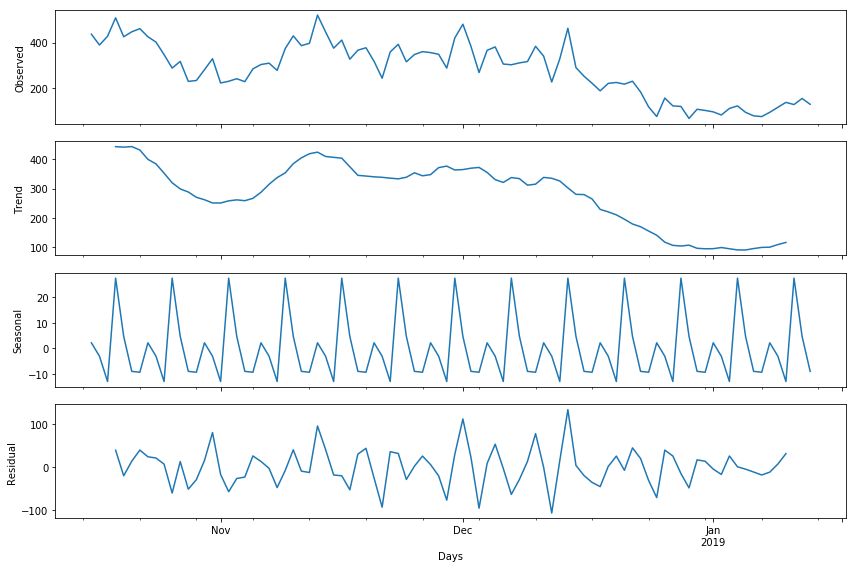

In [161]:
# Seaconal Decomposition of the Network Trace Data
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(average_daily_speed, model='additive')
fig = decomposition.plot()
plt.show()

In [162]:
# Define the p, d and q parameters to take any value between 0 and 2
# Generate all different combinations of p, q and q triplets
# Generate all different combinations of seasonal p, q and q triplets
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [163]:
print('Possible Parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Possible Parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [164]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [165]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(average_daily_speed,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1272.2901958785055
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1024.7192577047135
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:963.2788035015218
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:804.8926817878486
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:958.4202420132176
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:938.8540022587072
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:816.8552865813879
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:806.8556159307155
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1158.473174219036
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:934.93228670624
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:895.8070134929205
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:746.6182948770253
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:903.7576474917275
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:873.4736857635392
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:768.1084108850913
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:737.3107723023159
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:970.5820704205757
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:840.3845600173439
ARIMA(0, 1

In [ ]:
#Lowest AIC : ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:709.973547601076

In [166]:
mod = sm.tsa.statespace.SARIMAX(average_daily_speed,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5949      0.117     -5.104      0.000      -0.823      -0.366
ma.S.L12      -1.0000      0.151     -6.632      0.000      -1.296      -0.704
sigma2      3278.6753    4.6e-05   7.13e+07      0.000    3278.675    3278.675


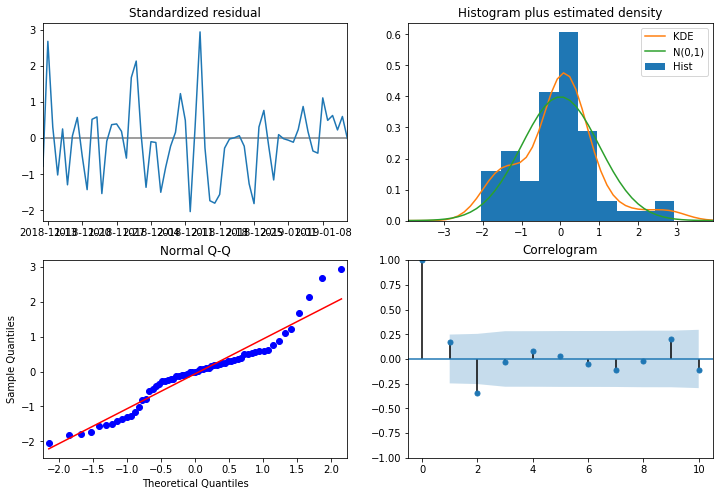

In [167]:
results.plot_diagnostics()
plt.show()

In [168]:
pred = results.get_prediction(start=pd.to_datetime('2018-12-20'), dynamic=False)
pred_ci = pred.conf_int()

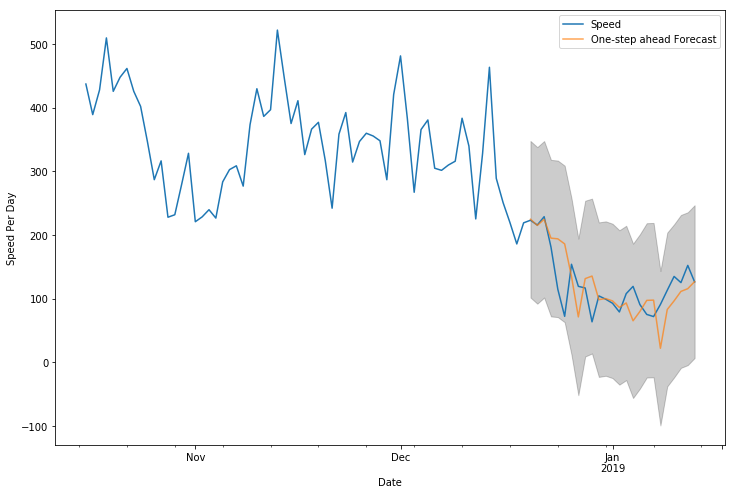

In [127]:
ax = average_daily_speed['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Speed Per Day')
plt.legend()

plt.show()

In [197]:
df_mse = pd.read_csv('mse_aofa_lond_in.csv')
df_mse = df_mse.set_index('Days')
y_forecasted = df_mse['y_forecasted']
y_truth = df_mse['y_truth']
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 1625.45
The Root Mean Squared Error of our forecasts is 40.32


In [193]:
df_mse

,y_forecasted,y_truth
Days,,
20/12/2018,224.968104,223.388826
21/12/2018,215.286921,215.879720
22/12/2018,224.871591,228.973823
23/12/2018,195.290155,181.240180
24/12/2018,194.205838,114.956234
25/12/2018,186.210647,72.512225
26/12/2018,135.000467,154.237042
27/12/2018,71.579878,119.583671
28/12/2018,131.720274,117.028806


In [134]:
y = df['Speed'].resample('MS').mean()

In [133]:
average_daily_speed.head()

,Speed
Days,
2018-10-16,437.322709
2018-10-17,389.297759
2018-10-18,428.162168
2018-10-19,509.773571
2018-10-20,425.864657


In [128]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

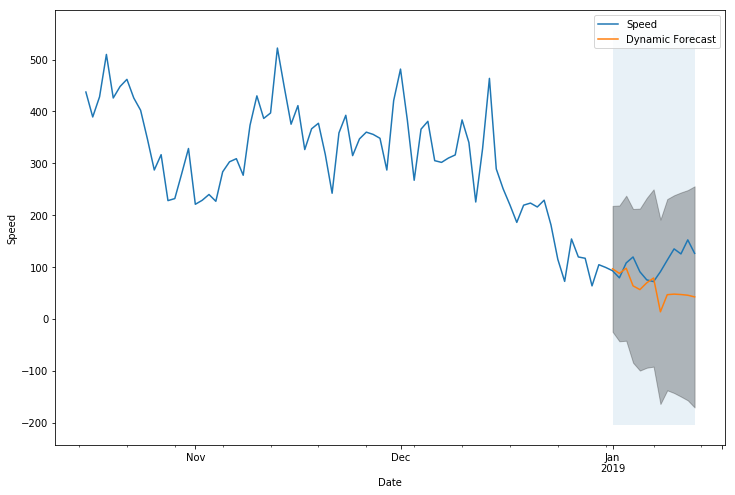

In [129]:
ax = average_daily_speed['2018':].plot(label='observed')
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-01-01'), average_daily_speed.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Speed')

plt.legend()
plt.show()

In [94]:
df.head()

,Speed
Days,
2018-10-16 00:00:00,408.349690
2018-10-16 01:00:00,457.998735
2018-10-16 02:00:00,424.732987
2018-10-16 03:00:00,354.733448
2018-10-16 04:00:00,362.946799


In [57]:
# Get forecast 24 steps ahead in future
pred_uc = results.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

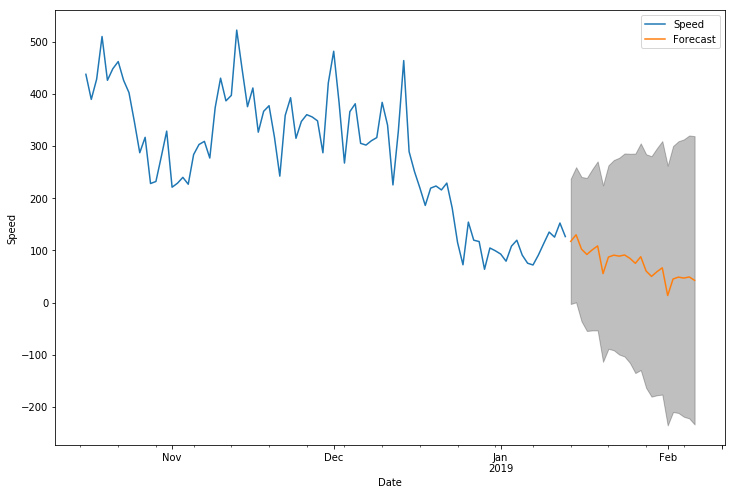

In [58]:
ax = average_daily_speed.plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Speed')

plt.legend()
plt.show()